# Prosper Loan Project
## Uyen Hoang
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Informations in data will be used to analyzed and visualized. 

In [64]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Assessing Data

In [65]:
# load data
df = pd.read_csv('prosperLoanData.csv')
df.sample(15)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
80093,DF0B346637877098590AF7E,428830,2009-10-15 15:29:47.573000000,NaN,36,Completed,2010-08-17 00:00:00,0.37733,0.3500,0.3400,...,-11.10,0.00,0.00,0.00,0.0,1.0,0,0,0.0,13
81865,D9273587158457623622314,877979,2013-08-23 09:18:18.147000000,NaN,60,Current,NaN,0.17522,0.1519,0.1419,...,-77.81,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
23308,558F359203241379751167C,1010826,2013-10-27 16:50:57.943000000,NaN,36,Current,NaN,0.26917,0.2310,0.2210,...,-9.88,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
72807,8F7C35441970029971D48CC,581094,2012-04-22 07:49:53.430000000,NaN,36,Completed,2013-05-02 00:00:00,0.08829,0.0749,0.0649,...,-82.07,0.00,0.00,0.00,0.0,1.0,0,0,0.0,257
4431,486A3423905830321E944DE,354081,2008-06-20 09:05:55.620000000,A,36,Completed,2011-06-30 00:00:00,0.19906,0.1844,0.1744,...,-251.83,0.00,0.00,0.00,0.0,1.0,0,0,0.0,309
69688,07423430089631398943F23,395720,2008-09-09 22:51:21.533000000,C,36,Completed,2011-09-22 00:00:00,0.20169,0.1796,0.1696,...,-33.47,0.00,0.00,0.00,0.0,1.0,0,0,0.0,83
108306,536F3418611270174437062,319863,2008-04-28 10:57:33.793000000,D,36,Completed,2011-05-06 00:00:00,0.16461,0.1430,0.1330,...,-49.49,0.00,0.00,0.00,0.0,1.0,0,0,0.0,99
48312,3A3A3480854955341C2607D,452464,2010-04-01 16:55:34.627000000,NaN,36,Completed,2013-04-13 00:00:00,0.27509,0.2520,0.2420,...,-45.02,0.00,0.00,0.00,0.0,1.0,0,0,0.0,147
53952,F07733920233848833F45E4,146468,2007-06-04 08:36:54.290000000,HR,36,Chargedoff,2009-02-14 00:00:00,0.30962,0.2900,0.2800,...,-10.30,-14.25,824.83,824.83,0.0,1.0,0,0,0.0,8
28671,C331358516401102656559E,848170,2013-07-23 00:40:34.483000000,NaN,60,Current,NaN,0.26877,0.2432,0.2332,...,-37.27,0.00,0.00,0.00,0.0,1.0,0,0,0.0,14


In [66]:
df.shape

(113937, 81)

In [67]:
#inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [68]:
#Checking for dupicated 
sum(df.duplicated())

0

In [69]:
#Checking data statistic
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [70]:
# Check for Null values
df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

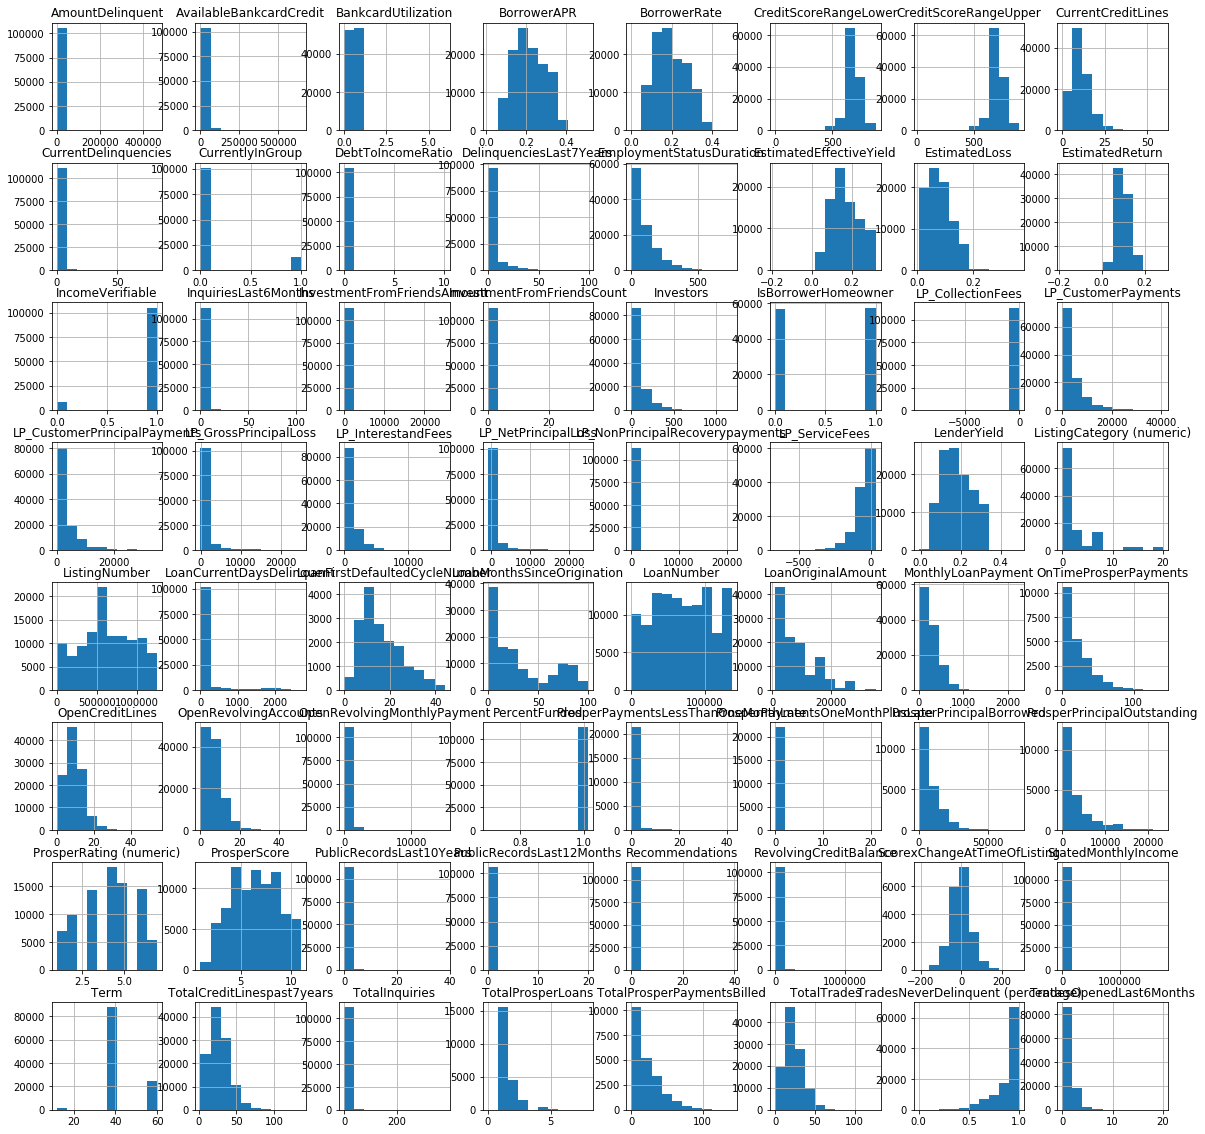

In [71]:
# Data inspected in visual
df.hist(figsize=(20,20));

In [72]:
# Drop columns will not be used for this project
df.drop(['ListingKey','LoanKey','CreditGrade','GroupKey','PublicRecordsLast10Years','PublicRecordsLast12Months','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent','LoanFirstDefaultedCycleNumber','LoanNumber','LP_NetPrincipalLoss','MemberKey','LP_NonPrincipalRecoverypayments','ClosedDate','Recommendations','EstimatedEffectiveYield','InvestmentFromFriendsCount','InvestmentFromFriendsAmount'], axis=1, inplace=True)


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 59 columns):
ListingNumber                         113937 non-null int64
ListingCreationDate                   113937 non-null object
Term                                  113937 non-null int64
LoanStatus                            113937 non-null object
BorrowerAPR                           113912 non-null float64
BorrowerRate                          113937 non-null float64
LenderYield                           113937 non-null float64
EstimatedLoss                         84853 non-null float64
EstimatedReturn                       84853 non-null float64
ProsperRating (numeric)               84853 non-null float64
ProsperRating (Alpha)                 84853 non-null object
ProsperScore                          84853 non-null float64
ListingCategory (numeric)             113937 non-null int64
BorrowerState                         108422 non-null object
Occupation                          

## Univariate Exploration

### How is loans distribution differently base on llocations, time, employment status, and credit scores, income rage?

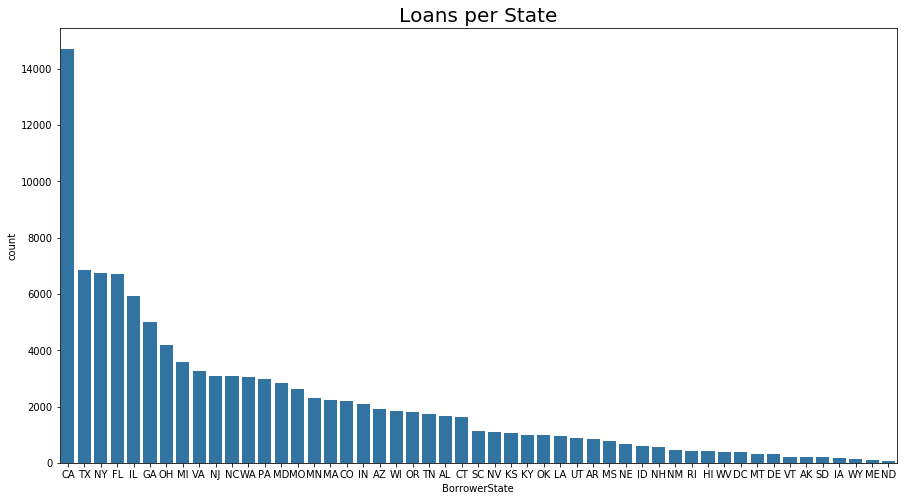

In [59]:
# Different numbers of loans in different states
base_color = sb.color_palette()[0]
plt.figure(figsize=(15, 8))
cat_order = df['BorrowerState'].value_counts().index
sb.countplot(data = df, x = 'BorrowerState', color = base_color, order = cat_order);
plt.title('Loans per State',fontsize=20);

CA have highest numbers of loans while North Dakota has the fewest number of loans. A key consideration is population; it could be a factor that cause the differences.

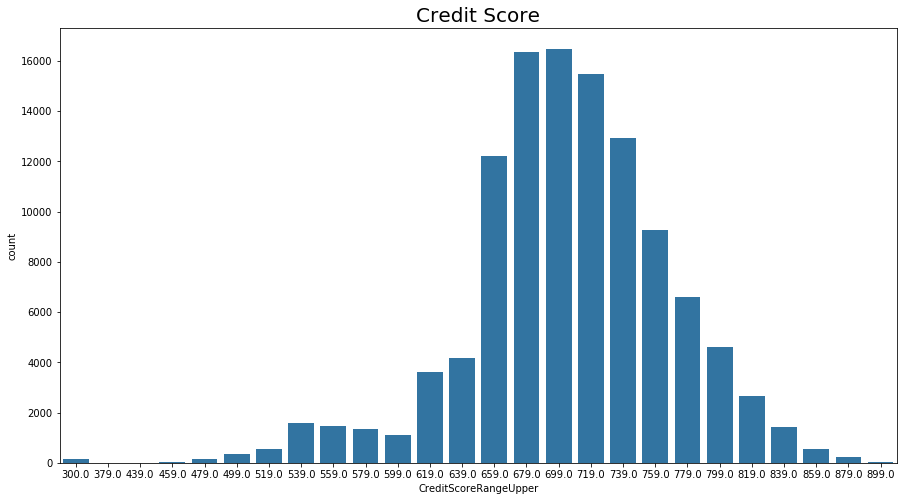

In [60]:
# credit score is range from 300-850, assummed that every score that lower than 300 are equal to 300
df.CreditScoreRangeUpper = df.CreditScoreRangeUpper.apply(lambda x: 300 if x < 300 else x)
# Checking credit score distribution
base_color = sb.color_palette()[0]
plt.figure(figsize=(15, 8))
cat_order = df['CreditScoreRangeUpper'].value_counts().index
sb.countplot(data = df, x = 'CreditScoreRangeUpper', color = base_color)
plt.title('Credit Score',fontsize=20);

- The most common credit score is 699.0
- 19.0 is an outlier; it's assumed to be an error

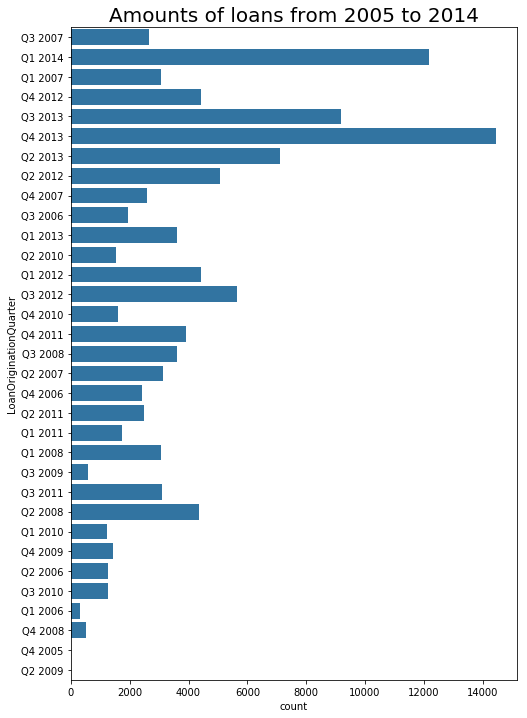

In [61]:
# checking number of loans follow by quarter
plt.figure(figsize=(8, 12))
cat_order = df['LoanOriginationQuarter'].value_counts().index
sb.countplot(data = df, y = 'LoanOriginationQuarter', color = base_color)
plt.title('Amounts of loans from 2005 to 2014',fontsize=20);

The largest number of loans are in the fourth quarter of 2013. The time that have the least number of loans are in second quarter of 2009 and fourth quarter of 2005

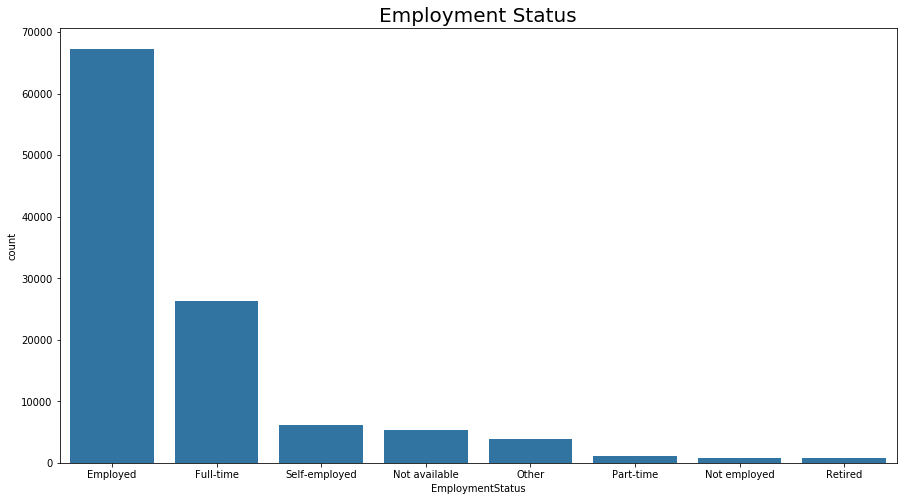

In [62]:
# Visualize employment status
plt.figure(figsize=(15, 8))
cat_order = df['EmploymentStatus'].value_counts().index
sb.countplot(data = df, x = 'EmploymentStatus', color = base_color, order = cat_order)
plt.title('Employment Status',fontsize=20);

Most people are Employed, the fewest loans belong to retired group

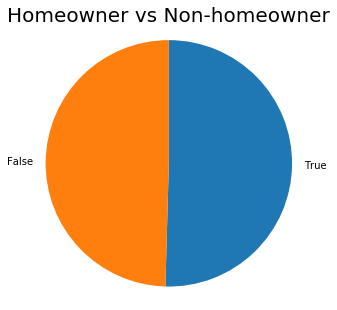

In [63]:
#plots show wherether borrowers are a home owner or not.
plt.figure(figsize=(5,5))
sorted_counts = df['IsBorrowerHomeowner'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')
plt.title('Homeowner vs Non-homeowner',fontsize=20);

People who is a home owner is lightly higher. 

In [39]:
# count of each state in the data
occupation_count = df.Occupation.value_counts()

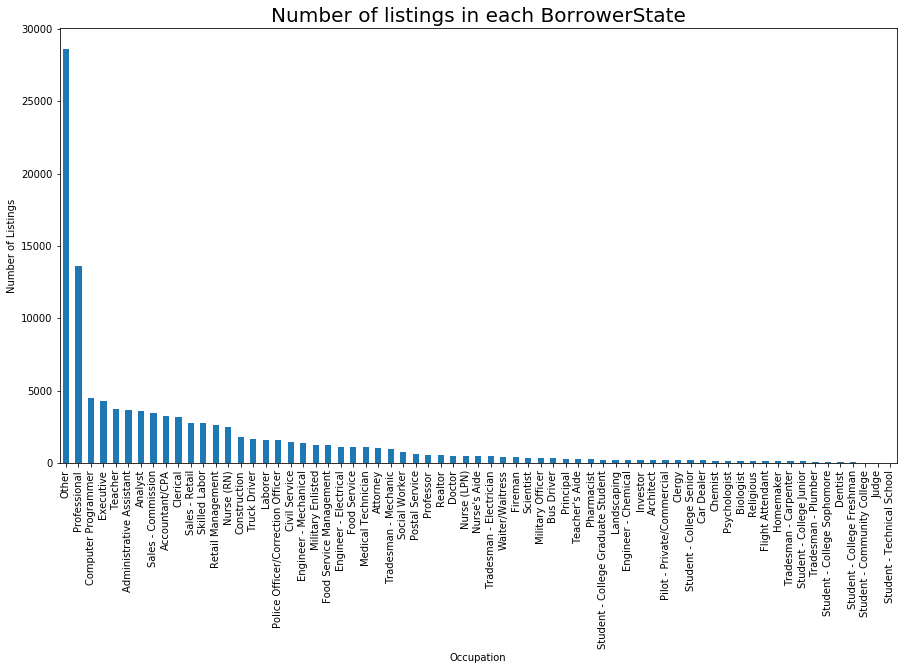

In [40]:
# plots the bar graph
color = sb.color_palette()[0]

plt.figure(figsize=(15, 8))
occupation_count.plot(kind='bar', color=color);

plt.title('Number of listings in each BorrowerState',fontsize=20);
plt.xlabel('Occupation');
plt.ylabel('Number of Listings');


When comparing occupation, other and professional have hold the most loans. These groups are unspecified to an exact occupation. Other than that, Computer Programmer is the group that have the most loans while student/community college, judge and student/technical school hold the least numbers of loans.

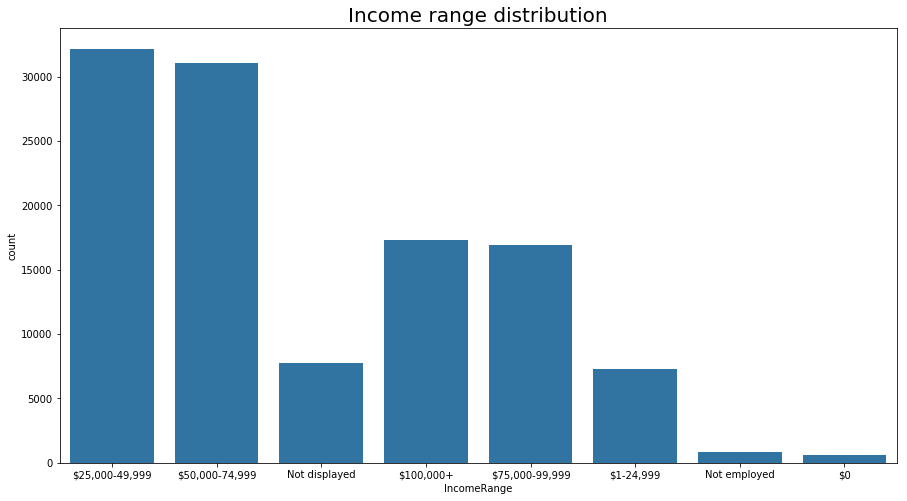

In [41]:
#checking loans based on income
base_color = sb.color_palette()[0]
plt.figure(figsize=(15, 8))
cat_order = df['IncomeRange'].value_counts().index
sb.countplot(data = df, x = 'IncomeRange', color = base_color);
plt.title('Income range distribution',fontsize=20);

Most loan holders has the income rage between 25,000 to 49,999

## Bivariate Exploration


#### Is it true that borrower who has higher income more likely to have better credit score? 

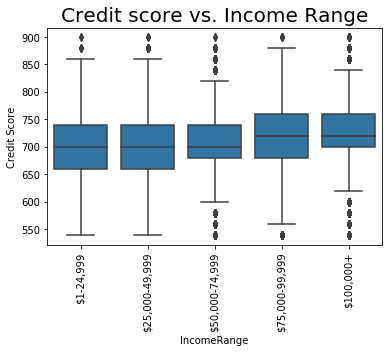

In [42]:
# orders the x axis 
order = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

# plots the boxplot
sb.boxplot(data=df, x='IncomeRange', y='CreditScoreRangeUpper', color=color, order=order);

plt.xticks(rotation=90);
plt.ylabel('Credit Score')
plt.title('Credit score vs. Income Range',fontsize=20);

Plot shows that member with higher income tends to have higher credit score.

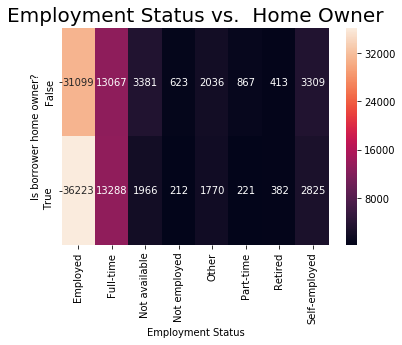

In [46]:

ct_counts = df.groupby(['EmploymentStatus', 'IsBorrowerHomeowner']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'IsBorrowerHomeowner', columns = 'EmploymentStatus', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd');
plt.xlabel('Employment Status');
plt.ylabel('Is borrower home owner?');
plt.title('Employment Status vs.  Home Owner',fontsize=20);

Plot showed people that employed and work full-time has mores loan compare to people who is working part-time or retired. When comparing whether or not a person owns a house, employed and fulltime job group that own house has higher number while it's less for non-homeowne groups.

## Multivariate Exploration

#### What are the differences on Borrower rate when comparing homeowner and non-homeowner throughout the years?

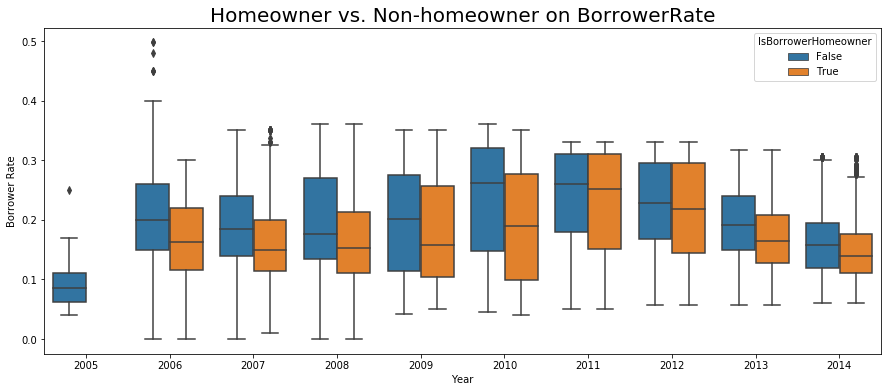

In [48]:
# Use the year from the creation date and create a column for it

df['year'] = df.ListingCreationDate.str.split('-').str[0]
# plots the boxplot to analyze homeowner's and non-homeowner's rate over years

g = sb.boxplot(data=df, x='year', y='BorrowerRate', hue='IsBorrowerHomeowner');
g.figure.set_figwidth(15)
g.figure.set_figheight(6)
plt.xlabel('Year');
plt.ylabel('Borrower Rate');
plt.title('Homeowner vs. Non-homeowner on BorrowerRate',fontsize=20);

Throughout time, there are some changes on interest rate when comparing Homeowner and Non-homeowner. The interest rate tend to be higher on Non-homeowner vs Homeowner. The borrower rate was highest in 2010, it then started to decrease until 2014.